# Материалы

Ссылка на презентацию https://docs.google.com/presentation/d/1v-esMVou2DODzZo9BMP23SguRaxjA-AwZIjmErBpqJk/edit?usp=sharing

# Анализ оттока клиентов банка "Метанпром"

Задача:
- Проанализируйте клиентов регионального банка и выделите сегменты клиентов,
которые склонны уходить из банка.
- Проведите исследовательский анализ данных, определите все значимые
признаки отточности (интервалы значений характеристик, которые связаны с
повышенным оттоком, сравните портреты типичных клиентов, которые
склонны и не склонны уходить из банка и т.д)
- Сформулируйте и проверьте статистические гипотезы.
- Проверьте гипотезу различия дохода между теми клиентами, которые
ушли и теми, которые остались.
- Сформулируйте и проверьте статистическую гипотезу относительно
представленных данных, которая поможет внести ясность в исследование
- Объединяя признаки отточности, сформируйте сегменты, отберите из них
лучшие и дайте по ним рекомендации

Выполнение задач будет осуществлено через следующие шаги:
1. Подготовка данных
- Импорт библиотек и загрузка данных
- Обработка таблицы
- Обработка пропусков
2. Исследовательский анализ данных
- Категоризация данных
- Анализ оттока по собственности
- Анализ оттока по последней активности
- Анализ оттока по кредитным картам
- Анализ оттока по полу
- Анализ оттока по рейтингу
3. Статистический анализ данных
- Различие дохода между отточными и оставшимися клиентами
- Различие рейтинга между отточными и оставшимися пользователями
4. Сегментация
5. Вывод и рекомендации для отдела менеджмента

## Подготовка данных

### Импорт библиотеки и загрузка данных.

In [41]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [42]:
#Загружаем данные, смотрим случайны записи в таблице
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
df.sample(15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
3950,139579,703.0,Ярославль,Ж,47.0,0,NaN,1,1,1,215176.31,0
2834,123576,944.0,Ярославль,М,40.0,0,NaN,1,0,0,246002.87,0
8471,196227,884.0,Ярославль,М,38.0,5,1374883.95,2,1,0,285187.38,0
8661,166838,816.0,Ярославль,М,24.0,4,541801.19,2,1,1,61707.08,1
9712,220945,889.0,Рыбинск,Ж,30.0,0,106192.92,2,1,1,144283.61,0
2079,147454,814.0,Рыбинск,Ж,35.0,3,660875.88,2,1,0,101574.11,0
5829,133082,892.0,Ярославль,М,37.0,5,2442481.15,2,1,0,168850.28,0
3453,142485,867.0,Ярославль,М,34.0,4,936318.53,2,1,1,151838.57,1
6527,125922,850.0,Ярославль,М,39.0,4,420340.85,2,1,0,148368.34,0
3188,153531,827.0,Рыбинск,М,56.0,4,470699.76,2,0,1,115944.08,0


In [43]:
#Проверим типы данных и количество пропусков в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [44]:
#Проверим основные статистические данные о датафрейме
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Данные в хорошеи состоянии, вызывает сомнение значени 0 в products, также минимальное значение дохода значительно ниже мрот, что также вызывает сомнение. Разберем эти аномалии позднее

### Обработка таблицы

In [45]:
#проверим категориальные данные значение на уникальность
print(df['gender'].unique(), df['city'].unique(), df['equity'].unique(), df['products'].unique(), df['credit_card'].unique(), df['churn'].unique(), df['last_activity'].unique())

['Ж' 'М'] ['Рыбинск' 'Ярославль' 'Ростов'] [1 5 0 4 3 2 6 7 8 9] [2 3 1 4 5 0] [0 1] [1 0] [1 0]


В products обнаружено значение 0

In [46]:
df.loc[(df['products'] == 0) ]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [47]:
#вероятно значение 0 вызвано тем, что клиент ушел. Так как данные должны быть актуальными, уберем лишнее значение
df = df[df['products']!=0]
df.loc[(df['products'] == 0) ]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn


Приведем название столбцов к змеиному регистру. Приводить строки к нижнему регистру не будем, так как неявных дубликатов в строках нет.
Доля пропусков в age меньше 0.3%, удалим их

In [48]:
df.columns = map(str.lower, df.columns)
df = df.rename(columns={'userid':'user_id'})
df['est_salary'] = df['est_salary'].astype(int)
df['score'] = df['score'].astype(int)
df['age'].dropna(inplace=True)

In [49]:
#проверим явные дубликаты
df.duplicated().sum()

0

In [50]:
#проверим неявные дубликаты
df['user_id'].duplicated().sum()

73

Проверим получившиеся дубликаты

In [51]:
df.loc[df['user_id'].duplicated()].sample(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9104,222480,776,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073,0
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002,0
9508,160075,824,Рыбинск,Ж,57.0,3,355047.33,2,0,0,64351,0
9267,150667,931,Ярославль,М,41.0,0,NaN,1,0,0,261904,0
9406,217826,790,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400,0
5840,208738,839,Ярославль,М,60.0,5,1102438.37,2,0,1,116500,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835,0
2302,220816,934,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606,0
4870,197364,889,Ярославль,М,33.0,0,NaN,2,1,1,96173,0
1583,190253,726,Ярославль,М,49.0,0,NaN,1,1,1,177700,0


При проверке обнаружены 2 условия:
- Нет дубликатов из Ростова (только рыбинск и Ярославль)
- Все клиенты не отточные

Вероятно было копирование данных по определенным условиям, из за чего дубликаты снова попали в датасет

Удалим дубликаты

In [52]:
df = df.drop_duplicates(subset=['user_id'])

df['user_id'].duplicated().sum()

0

In [53]:
#Посмотрим количество зарплат меньше 17000, если значение слишком маленькое - отбросим как вброс.
df[df['est_salary']<17000]['user_id'].count()

94

Количество значений в районе 1%, отбросим нерепрезентативные данные

In [54]:
df = df[df['est_salary']>17000]

**При обработке таблицы проанализированы явные и неявные дубликаты, убраны вбросы. Колонки приведены к змеиному регистру**

### Обработка пропусков

В age прпоусков менее 0.3%, поэтому их замена медианой не сильно повлияет на выводы исследования

In [55]:
df['age'] = df['age'].fillna(df['age'].median())

In [56]:
#Разберем 22.5% пропусков в balance. Значение nan может быть вызвано тем, что клиент ушел так как у нас 21.8% отточных клиентов и 22.5% пропусков
df.loc[(df['balance'].isnull()) ].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2259.000000,2259.000000,2259.000000,2259.000000,0.0,2259.000000,2259.000000,2259.000000,2.259000e+03,2259.000000
mean,171986.254095,865.292165,42.109340,0.050465,NaN,1.162019,0.815848,0.549358,2.267893e+05,0.005312
std,33280.678042,89.666218,11.930564,0.218951,NaN,0.400786,0.387694,0.497668,1.999809e+05,0.072706
min,114182.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027400e+04,0.000000
25%,143046.000000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.205020e+05,0.000000
50%,172549.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.747670e+05,0.000000
75%,201356.500000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.404820e+05,0.000000
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


около 99.5% пропусков в products не является отточными. В целом эти пользователи не обладают собственностью, но обладают большим доходом, чем в среднем по дататсету. Так как причины неясны, лучше оставить пропуски

**При подготовке данных совершены следуюзие действия:**
- Загружены библиотеки и данные
- Проверены явные и неявные дубликаты
- Столбцы приведены к змеиному регистру
- Заменены типы данных
- Убраны выбросы

## Исследовательский анализ данных

### Категоризация данных

c:\Users\Hasee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x700 with 0 Axes>

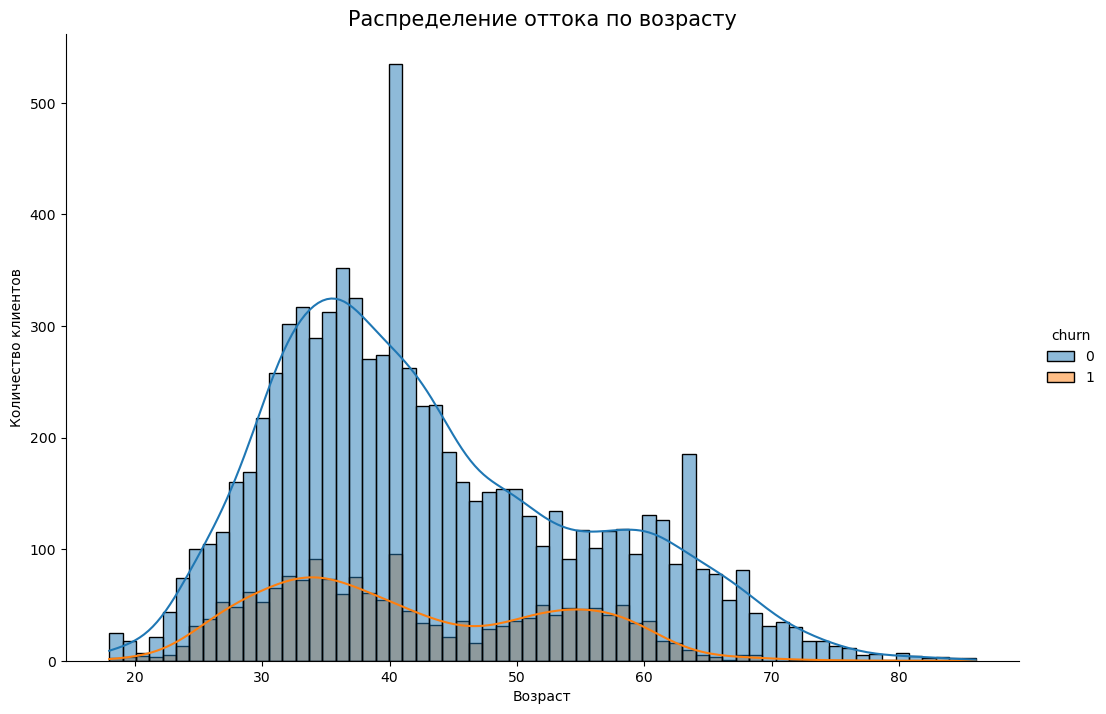

In [57]:
# Посмотрим распределение отточных клиентов по возрасту:
plt.figure(figsize=(12, 7)) 
sns.displot(df, x='age', hue='churn', kde=True, height=7, aspect=1.5, bins=65)   
plt.title('Распределение оттока по возрасту', fontsize=15) 
plt.xlabel('Возраст') 
plt.ylabel('Количество клиентов')   
plt.show()

По тенденциям отточных клиентов можно выделить 4 группы:
1. 18 - 24 характиризуется малым количеством пользователей и средним оттоком
2. 25 - 45 наибольшее количество пользователей и средний отток
3. 46 - 62 умеренное количество пользователей и большой отток
4. 63+ малое количество пользователей и малый отток


In [58]:
# создадим функцию age_group для распределения клиентов по возрастным группам:

def age_group(age):
    if 25 > age >= 18:
        return '18-24'
    if 45 >= age >= 25:
        return '25-45'
    if 62 >= age >= 46:
        return '46-62'
    if 63 <= age:
        return '63+'   

In [59]:
# вызовем get dummies для получения булевых значений и построения тепловой карты полов, городов и возрастных групп
df['gender_dum'] = df['gender']
df['city_dum'] = df['city']
df = pd.get_dummies(df, columns=['gender_dum', 'city_dum'])
df = df.rename (columns = ({
    'gender_dum_Ж':'fem', 'gender_dum_М':'male','city_dum_Ростов':'rostov', 
    'city_dum_Рыбинск':'rybinsk', 'city_dum_Ярославль':'yaroslavl'}))

In [60]:
df['age_group'] = df['age'].apply (age_group)
df['age_group_dum']=df['age_group']
df = pd.get_dummies(df, columns = ['age_group_dum'])
df = df.rename (columns = ({
    'age_group_dum_18-24':'18-24', 'age_group_dum_25-45':'25-45','age_group_dum_46-62':'46-62', 
    'age_group_dum_63+':'63+'}))
df.sample(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,fem,male,rostov,rybinsk,yaroslavl,age_group,18-24,25-45,46-62,63+
1697,176184,917,Ярославль,Ж,62.0,0,NaN,1,0,0,...,True,False,False,False,True,46-62,False,False,True,False
6802,201439,908,Ярославль,Ж,72.0,5,1772599.64,3,1,0,...,True,False,False,False,True,63+,False,False,False,True
6592,226143,846,Ярославль,Ж,60.0,3,299567.30,2,0,0,...,True,False,False,False,True,46-62,False,False,True,False
54,210764,748,Рыбинск,М,46.0,2,182889.96,1,1,1,...,False,True,False,True,False,46-62,False,False,True,False
5942,151599,657,Рыбинск,Ж,34.0,0,NaN,2,1,1,...,True,False,False,True,False,25-45,False,True,False,False


<Axes: >

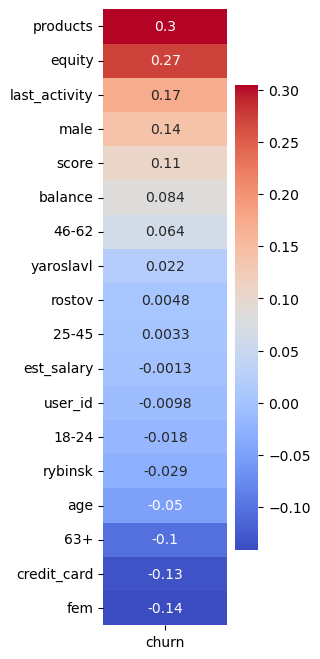

In [61]:
# Построим тепловую карту
plt.figure(figsize=(2,8))
heat_df = df.corr(numeric_only=True).drop(index='churn')[['churn']].sort_values(by='churn', ascending = False)
sns.heatmap (heat_df, annot=True, cmap= 'coolwarm', )

Исходя из тепловой карты наибольшая корреляция оттока имеет со следующими показателями:
- Количество продуктов, которыми пользуется клиент
- Собственность клиента(чем больше, тем вероятнее уход)
- Последняя активность(покидают более активные пользователи)
- Пол(Мужчины более склонны покидать, женщины менее)
- Рейтинг
- Возраст(63+ уходят реже, 46-62 чаще)

Рассмотрим эти значения точнее

### Анализ оттока по количеству продуктов

<Axes: title={'center': 'Доля ушедших клиентов, в зависимости от количества продуктов'}, xlabel='Количество продуктов', ylabel='% ушедших клиентов'>

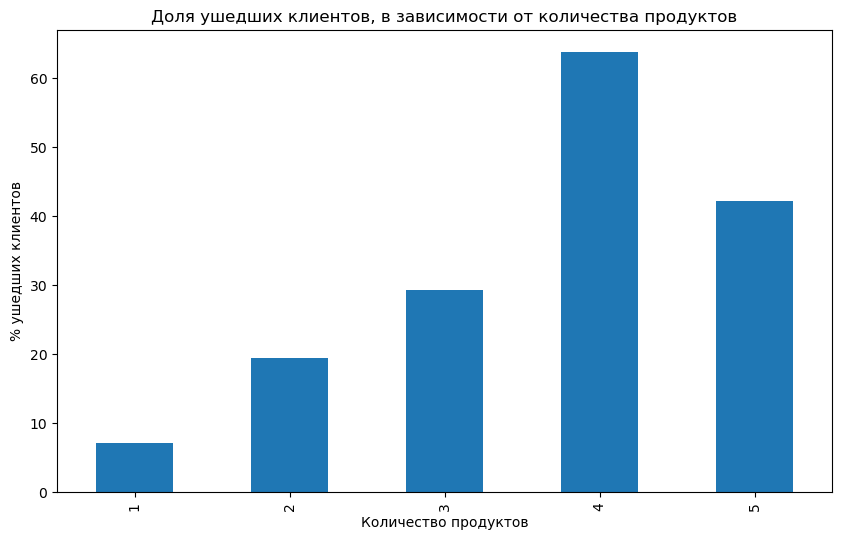

In [62]:
products_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = ['sum', 'count']
products_churn ['%'] = products_churn['sum']/products_churn['count']*100

products_churn['%'].plot (
    kind='bar', title = 'Доля ушедших клиентов, в зависимости от количества продуктов',
    xlabel = 'Количество продуктов', ylabel = '% ушедших клиентов', figsize = (10,6))

При увеличении количества продуктов увеличивается доля оттока.

### Анализ оттока по собственности

<Axes: title={'center': 'Доля ушедших клиентов, в зависимости от их собственности'}, xlabel='Оценка собственности', ylabel='% ушедших клиентов'>

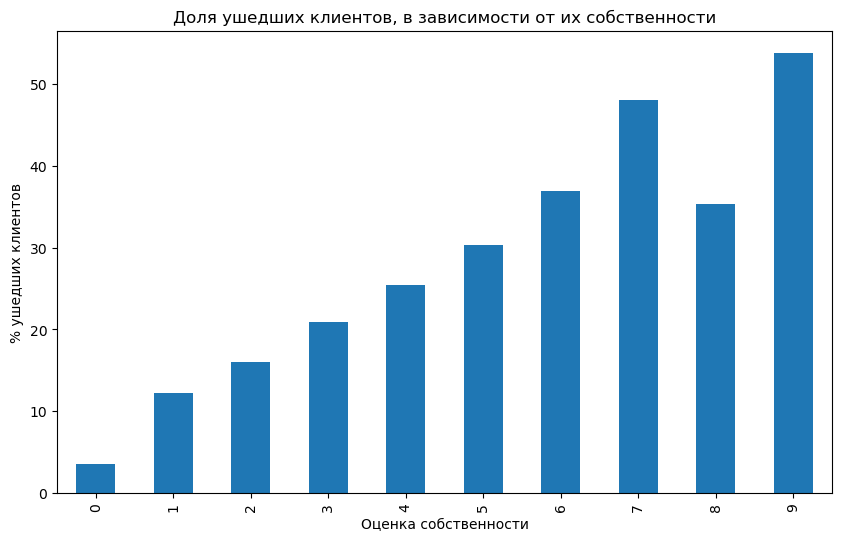

In [63]:
#Построим таблицу и визуализцию отображающую долю ушедших клиентов по собственности

equity_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = ['sum', 'count']
equity_churn ['%'] = equity_churn['sum']/equity_churn['count']*100

equity_churn['%'].plot (
    kind='bar', title = 'Доля ушедших клиентов, в зависимости от их собственности',
    xlabel = 'Оценка собственности', ylabel = '% ушедших клиентов', figsize = (10,6))

Очевидна зависимость, чем больше собственность клиента, тем больше доля ушедших клиентов

### Анализ оттока по последней активности

<Axes: title={'center': 'Доля ушедших клиентов в зависимости от последней активности'}, xlabel='Активность клиента', ylabel='% ушедших клиентов'>

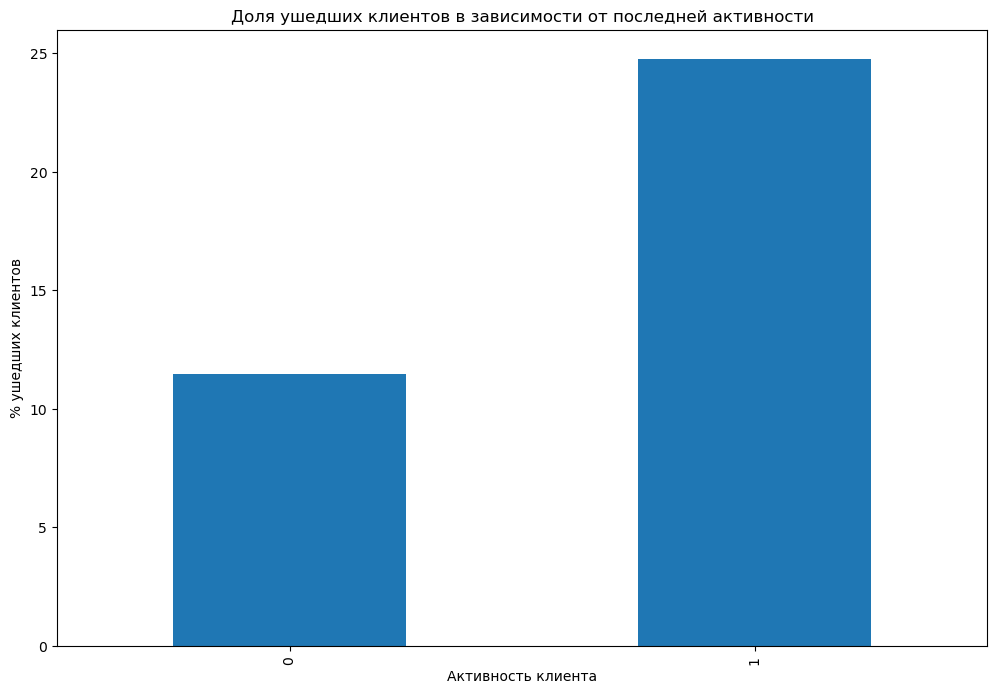

In [64]:
# Рассчитаем долю ушедших клиентов в зависимости от последней активности

activity_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activity_churn.columns = ['sum', 'count']
activity_churn ['%'] = activity_churn['sum']/activity_churn['count']*100

activity_churn['%'].plot(
    kind='bar', title = 'Доля ушедших клиентов в зависимости от последней активности', figsize = (12,8), 
    ylabel = '% ушедших клиентов', xlabel = 'Активность клиента')

По графику видно, что чем больше активность клиента, тем больше доля ушедших клиентов. Активные пользователи сильнее реагируют на изменения, а также в общем склонны искать наилучшие банки и перебегать между ними.

### Анализ оттока по кредитным картам

<Axes: title={'center': 'Доля ушедших клиентов в зависимости от наличия кредитных карт'}, xlabel='Наличие кредитной карты', ylabel='% ушедших клиентов'>

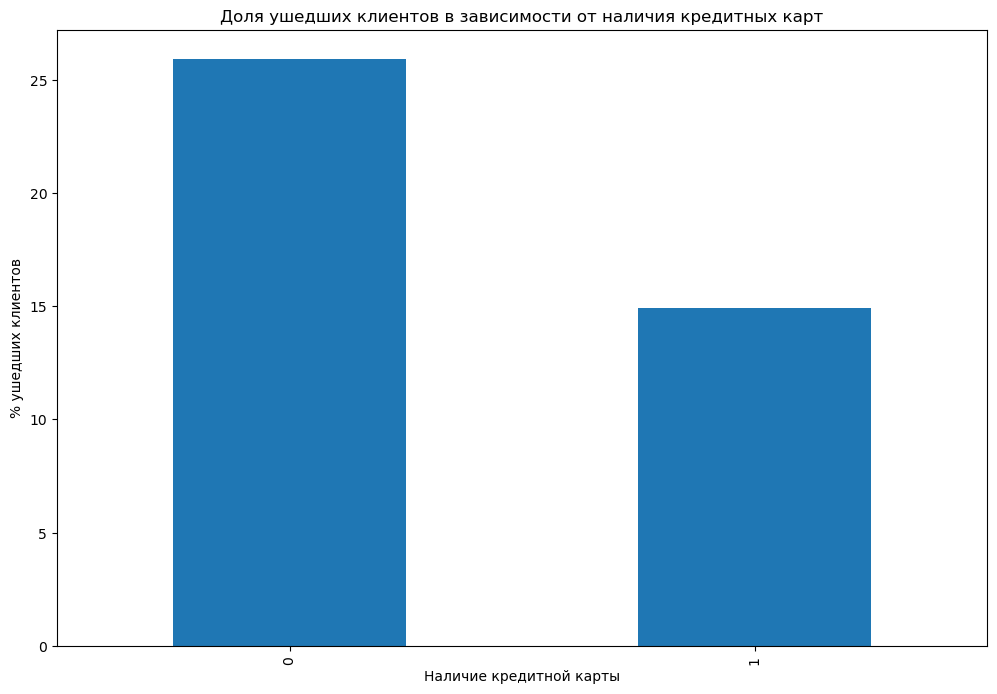

In [65]:
# Рассчитаем долю ушедших клиентов в зависимости от наличия кредитных карт

credit_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_churn.columns = ['sum', 'count']
credit_churn ['%'] = credit_churn['sum']/credit_churn['count']*100

credit_churn['%'].plot(
    kind='bar', title = 'Доля ушедших клиентов в зависимости от наличия кредитных карт', figsize = (12,8), 
    ylabel = '% ушедших клиентов', xlabel = 'Наличие кредитной карты')

Заметно, что пользователи без кредитной карты гораздо проще уходят, чем с кредитной карты

### Анализ оттока по полу

<Axes: title={'center': 'Доля ушедших клиентов в зависимости от пола'}, xlabel='Пол клиента', ylabel='% ушедших клиентов'>

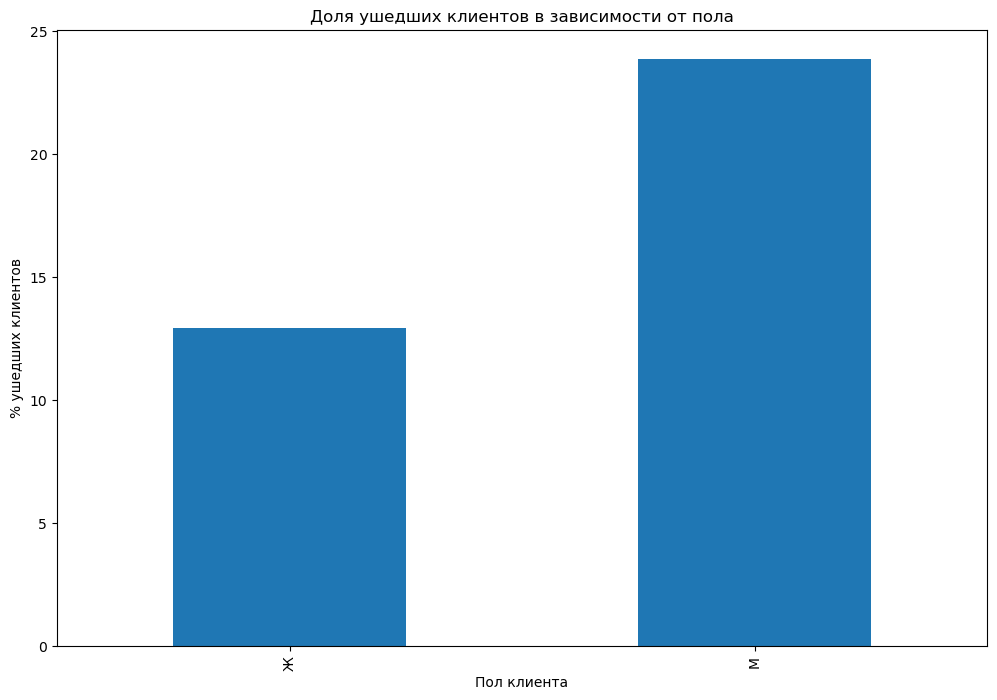

In [66]:
# Рассчитаем долю ушедших клиентов в зависимости от пола

gender_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = ['sum', 'count']
gender_churn ['%'] = gender_churn['sum']/gender_churn['count']*100

gender_churn['%'].plot(
    kind='bar', title = 'Доля ушедших клиентов в зависимости от пола', figsize = (12,8), 
    ylabel = '% ушедших клиентов', xlabel = 'Пол клиента')

Среди мужчин наблюдается больший отток, чем среди женщин

### Анализ оттока по рейтингу

<Axes: title={'center': 'Доля ушедших клиентов в зависимости от рейтинга'}, xlabel='Рейтинг клиента', ylabel='% ушедших клиентов'>

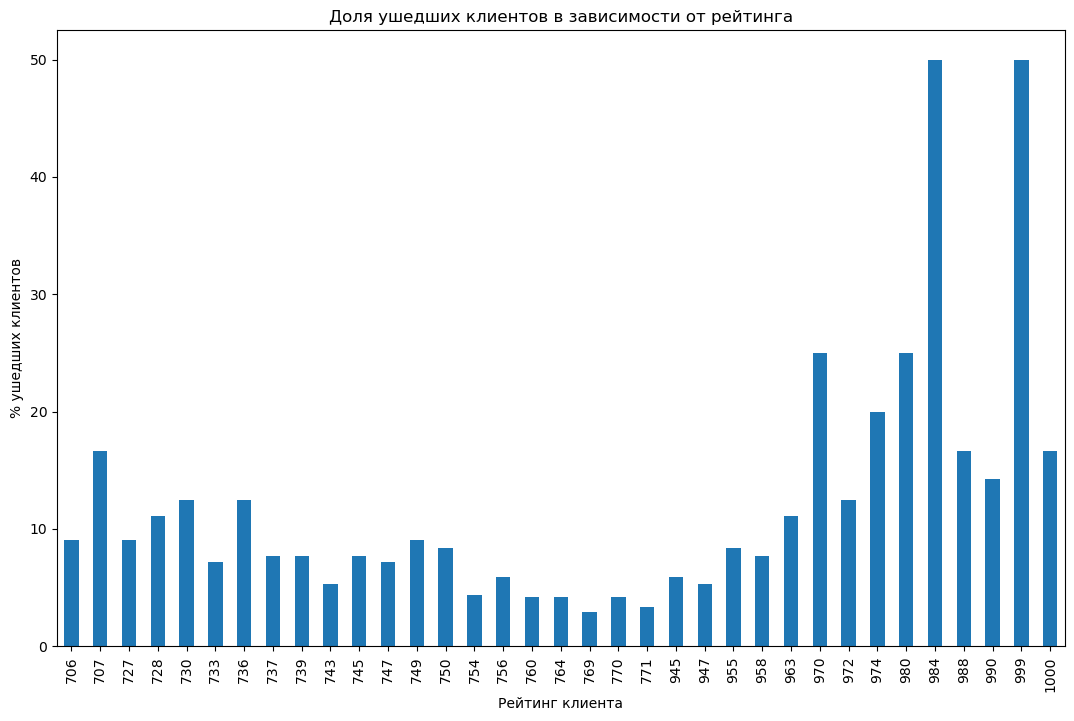

In [67]:
# Рассчитаем долю ушедших клиентов по рейтингу

score_churn = df.pivot_table (index = 'score', values = 'churn', aggfunc = ['sum', 'count'])
score_churn.columns = ['sum', 'count']
score_churn ['%'] = score_churn['sum']/score_churn['count']*100
score_churn = score_churn[score_churn['sum'] == 1]

score_churn['%'].plot(
    kind='bar', title = 'Доля ушедших клиентов в зависимости от рейтинга', figsize = (13,8), 
    ylabel = '% ушедших клиентов', xlabel = 'Рейтинг клиента')

Вырисовываются 2 закономерности:
1. При увеличении рейтинга до 770, доля ушедших уменьшается
2. При увеличении рейтинга с 770, доля ушедших значительно увеличивается
Оценим влияение 1 тенденции по количеству, учитывая что 1 квартиль находится на значении 802

In [68]:
#Посмотрим долю 1 тенденции в проценте от пользователей
df['score'].quantile(.1)

765.0

Так как на 1 тенденцию приходится около 10% измерений, данных относительно мало, за недостаточностью информации сделаем вывод, что до 955 доля ушедших относительно постоянна, в дальнейшем доля начинает значительно расти

### Анализ оттока по возрасту

,sum,count,%
age_group,,,
18-24,30,219,13.698630
25-45,1139,6147,18.529364
46-62,611,2723,22.438487
63+,32,743,4.306864


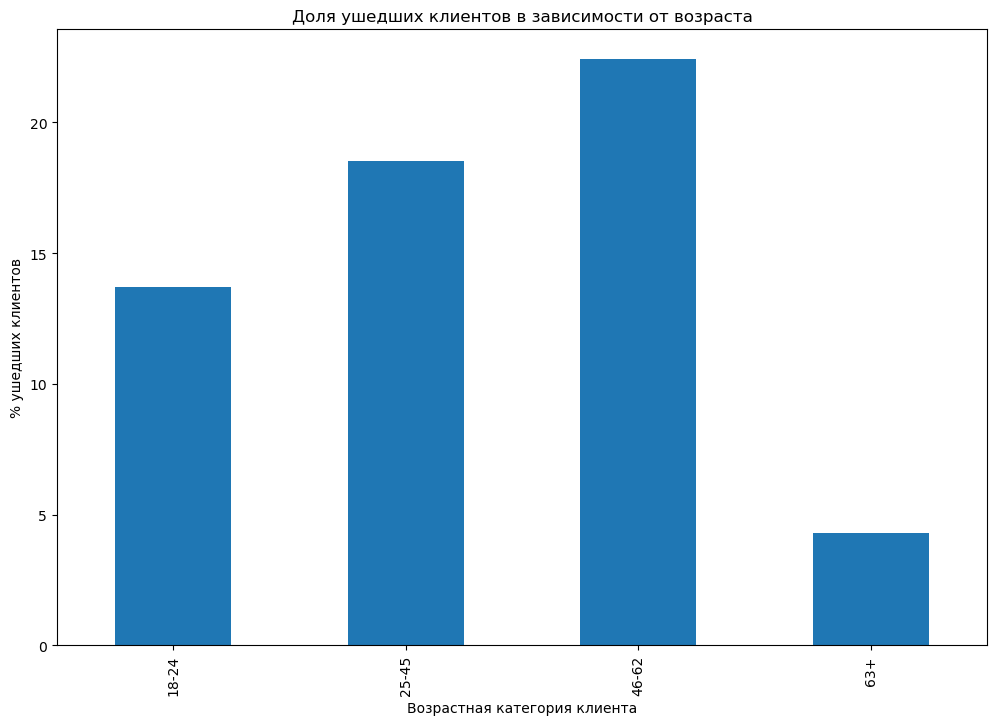

In [69]:
# Рассчитаем долю ушедших клиентов в зависимости от возраста

age_churn = df.pivot_table (index = 'age_group', values = 'churn', aggfunc = ['sum', 'count'])
age_churn.columns = ['sum', 'count']
age_churn ['%'] = age_churn['sum']/age_churn['count']*100

age_churn['%'].plot(
    kind='bar', title = 'Доля ушедших клиентов в зависимости от возраста', figsize = (12,8), 
    ylabel = '% ушедших клиентов', xlabel = 'Возрастная категория клиента')

age_churn

1. Наибольшей долей оттока обладают клиенты 46-62 (22.4%)
2. В сегменте 25-45 заметен отток около 18,5%, что чуть ниже среднего значения, но значительно больше двух оставшихся категорий
3. Категории до 25 и более 63 характеризуются малым количеством пользователей (чуть меньше 1000 в сумме) и небольшой долей отточных клиентов

**В ходе исследовательского анализа данных построено распределение оттока по возрасту и построены возрастные категории. Построен хитмеп для отображения зависимости оттока от различных переменных. По наибольшим корреляциям были построены графики, отображающие отток по каждой категории. В ходе исследования получены следующие выводы:**
- Клиенты которые имеют 3 и более продуктов чаще среднего покидали компанию
- По оценке собственности значительное превышение среднего значения начинается с 4
- Активные клиенты чаще покидали компанию
- Среди отточных клиентов значительно больше мужчин
- Клиенты с кредитной карты меньше подвержены оттоку
- Заметен отток клиентов с рейтингом 950+

- По возрастным группам заметна следующая тенденция: 
1. Наибольшей долей оттока обладают клиенты 46-62 (22.4%)
2. В сегменте 25-45 заметен отток около 18,5%, что чуть ниже среднего значения, но значительно больше двух оставшихся категорий
3. Категории до 25 и более 63 характеризуются малым количеством пользователей (чуть меньше 1000 в сумме) и небольшой долей отточных клиентов

## Статистический анализ данных

C:\Users\Hasee\AppData\Local\Temp\ipykernel_11796\4106060789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==0]['est_salary'],label='1')
C:\Users\Hasee\AppData\Local\Temp\ipykernel_11796\4106060789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['est_sa

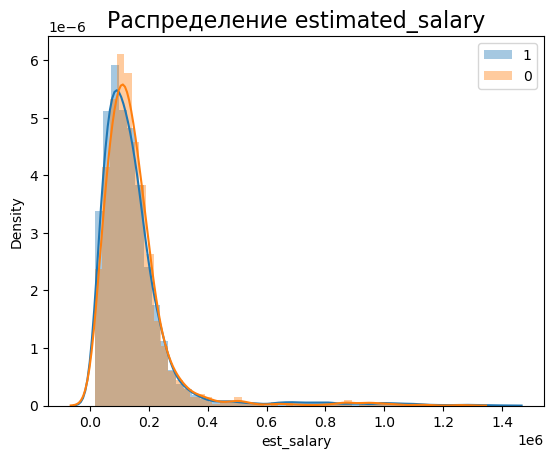

In [70]:
#Проверим является ли распределение нормальным для проведения t теста
sns.distplot(df[df['churn']==0]['est_salary'],label='1')
sns.distplot(df[df['churn']==1]['est_salary'],label='0')
plt.title('Распределение estimated_salary',fontsize=16)
plt.legend()
plt.show()

Так как распределение близко к нормальном, и мы имеем 2 независимые выборки самым удобным методом проверки гипотезы является тест Стьюдента

### Различие дохода между отточными и оставшимися клиентами

Выдвинем гипотезы:

H0 - доход отточных и оставщихся пользователей равен

H1 - доход отточных и оставщихся пользователей не равен

In [71]:
results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05


print (results.pvalue) 


if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8915736718749708
Не получилось отвергнуть нулевую гипотезу


По результатам тестам мы не можем отвергнуть нулевую гипотезу, поэтому будем считать, что доходы отточных и оставшихся пользователей 

### Различие рейтинга между отточными и оставшимися пользователями

Сформулируем гипотезы

H0 - рейтинг оставшихся и отточных пользователей равны

H1 - рейтинг оставшихся и отточных пользователей не равны

In [72]:
results = st.ttest_ind (
    df[df['churn']==0]['score'],
    df[df['churn']==1]['score'], equal_var = False)

alpha = 0.05


print (results.pvalue) 


if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.7100221361709243e-36
Отвергаем нулевую гипотезу


Вывод t теста подвтерждает выод на этапе исследовательского анализа о неравенстве рейтинга среди отточных и оставшихся пользователей

**В ходе статистического анализа были проверены следующие гипотезы:**
1. Нельзя отвергнуть нулевую гипотезу, поэтому будем считать, что доходы отточных и оставшихся пользователей 
2. Вывод t теста подвтерждает выод на этапе исследовательского анализа о неравенстве рейтинга среди отточных и оставшихся пользователей

## Сегментация

**Сегмент 1:**

- Собственность 5 и более
- Последняя активность
- Возраст 25-62


In [73]:
 first_cluster = df.query( ' equity > 4 and last_activity==1 and age > 24  and age < 63')

first_rate = first_cluster['churn'].sum() / first_cluster['churn'].count() * 100
first_sum = first_cluster['churn'].sum()
first_count = first_cluster['churn'].count()

print('Количество людей в сегменте', first_count)
print('Количество отточных клиентов', first_sum)
print('Доля отточных клиентов', first_rate.round(1))

Количество людей в сегменте 1064
Количество отточных клиентов 503
Доля отточных клиентов 47.3


**Сегмент 2:**

- Количество продуктов 3 и более
- Мужской пол
- Возраст 25-62

In [74]:
second_cluster = df.query( ' products > 2  and gender == "М" and age > 24  and age < 63')

second_rate = second_cluster['churn'].sum() / second_cluster['churn'].count() * 100
second_sum = second_cluster['churn'].sum()
second_count = second_cluster['churn'].count()

print('Количество людей в сегменте', second_count)
print('Количество отточных клиентов', second_sum)
print('Доля отточных клиентов', second_rate.round(1))

Количество людей в сегменте 708
Количество отточных клиентов 363
Доля отточных клиентов 51.3


**Сегмент 3:**

- Последняя активность
- Мужской пол
- Нет кредитной карты

In [75]:
third_cluster = df.query( 'gender == "М" and last_activity==1 and credit_card == 0 ')

third_rate = third_cluster['churn'].sum() / third_cluster['churn'].count() * 100
third_sum = third_cluster['churn'].sum()
third_count = third_cluster['churn'].count()

print('Количество людей в сегменте', third_count)
print('Количество отточных клиентов', third_sum)
print('Доля отточных клиентов', third_rate.round(1))

Количество людей в сегменте 715
Количество отточных клиентов 302
Доля отточных клиентов 42.2


**Сегмент 4:**

- Мужской пол
- Количество продуктов = 4

In [76]:
fourth_cluster = df.query('gender == "М"  and products == 4')

fourth_rate = fourth_cluster['churn'].sum() / fourth_cluster['churn'].count() * 100
fourth_sum = fourth_cluster['churn'].sum()
fourth_count = fourth_cluster['churn'].count()

print('Количество людей в сегменте', fourth_count)
print('Количество отточных клиентов', fourth_sum)
print('Доля отточных клиентов', fourth_rate.round(1))

Количество людей в сегменте 292
Количество отточных клиентов 200
Доля отточных клиентов 68.5


**Сегмент 5:** наименее отточный

In [77]:
fifth_cluster = df.query('gender == "Ж"  and last_activity==0')

fifth_rate = fifth_cluster['churn'].sum() / fifth_cluster['churn'].count() * 100
fifth_sum = fifth_cluster['churn'].sum()
fifth_count = fifth_cluster['churn'].count()

print('Количество людей в сегменте', fifth_count)
print('Количество отточных клиентов', fifth_sum)
print('Доля отточных клиентов', fifth_rate.round(1))

Количество людей в сегменте 2298
Количество отточных клиентов 129
Доля отточных клиентов 5.6


Построим график, отображающий общее количество клиентов в каждом кластере и количество отточных клиентов

<Axes: >

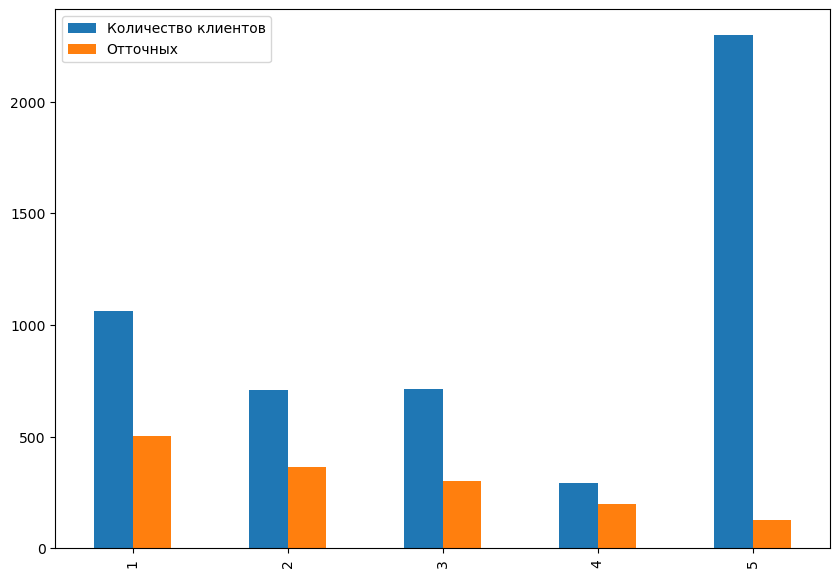

In [78]:
data = [
    [first_count, first_sum],
    [second_count, second_sum],
    [third_count, third_sum],
    [fourth_count, fourth_sum],
    [fifth_count, fifth_sum]
]

plot_data = pd.DataFrame(data, columns=['Количество клиентов', 'Отточных'])
plot_data.index = plot_data.index + 1


plot_data.plot(kind='bar', figsize=(10, 7))


**По итогу сегментации выделили следующие сегменты**
1. Активные клиенты 25-62 с собственностью 5 и более
2. Мужчины возраста 25-62 с 3 и более продуктами
3. Активные мужчины без кредитной карты
4. Обладает малым охватом но наибольшей отточностью - мужчины с 4 продуктами (292 людей в сегменте 68.5% оттока)
5. Большой сегмент обладающим низким оттоком - неактивные женщины




Исходя из этого можно сделать следующие рекомендации для отдела менеджмента:
1. Необходимо проверить последние изменения и фидбек по ним, так как заметно, что активные пользователи, которые чувствительнее ощущают все изменения проявляют большую отточность. Возможно некоторые изменения стоит откатить или имплементировать медленнее
2. Сделать отдельный сегмент для работы с клиентами с большой собственностью и большим количеством продуктов, так как премиальные клиенты ощущают неудовлетворенность и обладают наибольшей долей оттока
3. Также стоит расширять количество кредитных карт среди пользователей, так как пользователи кредитных карт значительно реже 
4. Создать дополнительные выгодные условия для премиальных клиентов: повышенный кешбек на премиальные карты, льготная страховка имущества
5. Дополнительно стоит расширить количество пользователей пенсионного возраста предлагая льготные условия при переводе пенсии на счета метанпромбанка

## Вывод

1. При подготовке данных совершены следуюзие действия:
- Загружены библиотеки и данные
- Проверены явные и неявные дубликаты
- Столбцы приведены к змеиному регистру
- Заменены типы данных
- Убраны выбросы

2. В ходе исследовательского анализа данных построено распределение оттока по возрасту и построены возрастные категории. Построен хитмеп для отображения зависимости оттока от различных переменных. По наибольшим корреляциям были построены графики, отображающие отток по каждой категории. В ходе исследования получены следующие выводы:
- Клиенты которые имеют 3 и более продуктов чаще среднего покидали компанию
- По оценке собственности значительное превышение среднего значения начинается с 4
- Активные клиенты чаще покидали компанию
- Среди отточных клиентов значительно больше мужчин
- Клиенты с кредитной карты меньше подвержены оттоку
- Заметен отток клиентов с рейтингом 950+

- По возрастным группам заметна следующая тенденция: 
1. Наибольшей долей оттока обладают клиенты 46-62 (22.4%)
2. В сегменте 25-45 заметен отток около 18,5%, что чуть ниже среднего значения, но значительно больше двух оставшихся категорий
3. Категории до 25 и более 63 характеризуются малым количеством пользователей (чуть меньше 1000 в сумме) и небольшой долей отточных клиентов


3. В ходе статистического анализа были проверены следующие гипотезы:
- Нельзя отвергнуть нулевую гипотезу, поэтому будем считать, что доходы отточных и оставшихся пользователей 
- Вывод t теста подвтерждает выод на этапе исследовательского анализа о неравенстве рейтинга среди отточных и оставшихся пользователей

4. По итогу сегментации выделили следующие сегменты
- Активные клиенты 25-62 с собственностью 5 и более
- Мужчины возраста 25-62 с 3 и более продуктами
- Активные мужчины без кредитной карты
- Обладает малым охватом но наибольшей отточностью - мужчины с 4 продуктами (292 людей в сегменте 68.5% оттока)
- Большой сегмент обладающим низким оттоком - неактивные женщины




Исходя из этого можно сделать следующие рекомендации для отдела менеджмента:
1. Необходимо проверить последние изменения и фидбек по ним, так как заметно, что активные пользователи, которые чувствительнее ощущают все изменения проявляют большую отточность. Возможно некоторые изменения стоит откатить или имплементировать медленнее
2. Сделать отдельный сегмент для работы с клиентами с большой собственностью и большим количеством продуктов, так как премиальные клиенты ощущают неудовлетворенность и обладают наибольшей долей оттока
3. Также стоит расширять количество кредитных карт среди пользователей, так как пользователи кредитных карт значительно реже 
4. Создать дополнительные выгодные условия для премиальных клиентов: повышенный кешбек на премиальные карты, льготная страховка имущества
5. Дополнительно стоит расширить количество пользователей пенсионного возраста предлагая льготные условия при переводе пенсии на счета метанпромбанка